##### Homework 1
##### MTH-9899 Baruch College
##### DATA SCIENCE II: Machine Learning

##### Jose Ferreira

**Problem 1** (10 points) Ignoring more sophisticated algorithms, like the Strassen algorithm, multiplying an $a \times b$ matrix by a $b \times c$ matrix takes $O(abc)$. 
Please work out the time complexity of computing a naive K-Fold Cross Validation Ridge Regression on an $N \times F$ input matrix.

----
The ridge regression formula is:
$$
\begin{align}
\hat{\beta} = (X^TX + \lambda I)^{-1}X^TY 
\end{align}
$$

For an $N \times F$ matrix it takes 
$$
\begin{align}
\hat{\beta} = \underbrace{\underbrace{(\underbrace{X^TX}_{O(NF^2)} + \lambda I)^{-1}}_{O(F^3)}X^TY}_{O(NF^2)} 
\end{align}
$$
If we consider that $N \gg F$, the dominant term is $O(NF^2)$

We need to repeat this operation $K$ times for the K-fold cross validation so the complexity of running a K-fold cross validation is $O(KNF^2)$

**Problem 2** (20 points) We can be more efficient. We don’t have to compute $(X^TX)^{−1}$ completely each time. In particular, if you break up $X$ into $K$ chunks, there is a faster way. 
$$
X = \begin{bmatrix}X_1 \\ X_2 \\ \vdots \\ X_K\end{bmatrix}
$$

$$
X^TX = \begin{bmatrix}X^T_1 & X^T_2 & \cdots & X^T_K\end{bmatrix} \begin{bmatrix}X_1 \\ X_2 \\ \vdots \\ X_K\end{bmatrix}\\
$$


Define $X_{−i}$ as $X$ with the ith fold omitted. Given these hints, write a description of how you can efficiently compute $X^T_{−i}X_{−i}$
for all K folds.


----
We can compute $(X^TX)$ one time and extract the matrix $X^T_{−i}X_{−i}$ needed for each fold by subtracting the matrix $X_i^TX_i$ where $X_i$ is the i-th chunk of $X$. As an example, looking at an input matrix $X$ with 2 features divided into 4 chunks:

$$
X = \begin{bmatrix}X_{11} & X_{12} \\ X_{21} & X_{22} \\ X_{31} & X_{32} \\ X_{41} & X_{42}\end{bmatrix}\\
$$

$$
\begin{align}
X^TX =& \begin{bmatrix}X_{11} & X_{21} & X_{31} & X_{41} \\ X_{12} & X_{22} & X_{32} & X_{42} \end{bmatrix} \begin{bmatrix}X_{11} & X_{12} \\ X_{21} & X_{22} \\ X_{31} & X_{32} \\ X_{41} & X_{42}\end{bmatrix}\\ \\
=& \begin{bmatrix}X_{11}^2+X_{21}^2+X_{31}^2+X_{41}^2 & 
 X_{11} X_{12}+X_{21} X_{22}+X_{31} X_{32}+X_{41} X_{42} \\
 X_{11} X_{12}+X_{21} X_{22}+X_{31} X_{32}+X_{41} X_{42} &
 X_{12}^2+X_{22}^2+X_{32}^2+X_{42}^2 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
X_{2}^TX_{2} =& \begin{bmatrix}X_{21} \\ X_{22}\end{bmatrix} \begin{bmatrix}X_{21} & X_{22}\end{bmatrix}
= \begin{bmatrix}X_{21}^2 &  X_{21} X_{22}\\
 X_{21} X_{22} & X_{22}^2\\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
X^TX - X_{2}^TX_{2} =& \begin{bmatrix}X_{11}^2+X_{21}^2+X_{31}^2+X_{41}^2 & 
 X_{11} X_{12}+X_{21} X_{22}+X_{31} X_{32}+X_{41} X_{42} \\
 X_{11} X_{12}+X_{21} X_{22}+X_{31} X_{32}+X_{41} X_{42} &
 X_{12}^2+X_{22}^2+X_{32}^2+X_{42}^2 \\
\end{bmatrix} - \begin{bmatrix}X_{21}^2 &  X_{21} X_{22}\\
 X_{21} X_{22} & X_{22}^2\\
\end{bmatrix}\\
=& \begin{bmatrix}X_{11}^2+X_{31}^2+X_{41}^2 & X_{11} X_{12}+X_{31} X_{32}+X_{41} X_{42} \\
                  X_{11} X_{12}+X_{31} X_{32}+X_{41} X_{42} & X_{12}^2+X_{32}^2+X_{42}^2 \\\end{bmatrix}
\end{align}
$$

$$
\begin{align}
X_{-2}^TX_{-2} =& \begin{bmatrix}X_{11} &  X_{31} & X_{41} \\ X_{12} & X_{32} & X_{42} \end{bmatrix} \begin{bmatrix}X_{11} & X_{12} \\ X_{31} & X_{32} \\ X_{41} & X_{42}\end{bmatrix}\\ \\
=& \begin{bmatrix}X_{11}^2+X_{31}^2+X_{41}^2 & X_{11} X_{12}+X_{31} X_{32}+X_{41} X_{42} \\
                  X_{11} X_{12}+X_{31} X_{32}+X_{41} X_{42} & X_{12}^2+X_{32}^2+X_{42}^2 \\\end{bmatrix}
\end{align}
$$

Therefore: 
$$
X^TX - X_{2}^TX_{2} = X_{-2}^TX_{-2}
$$


In [1]:
import numpy as np

# Using the modified version to generate the same betas for the two sets as proposed by David Wang in the Forum
def generate_test_data_set1(n, test_sample = False):
    f = 5
    #np.random.seed(1 if test_sample else 2)
    np.random.seed(0)
  
    true_betas = np.random.randn(f)
    
    np.random.seed(1 if test_sample else 2)
    
    X = np.random.randn(n, f)
    Y = np.random.randn(n) + X.dot(true_betas)
    return (X,Y)

def generate_test_data_set2(n, test_sample = False):
    f = 5
    #np.random.seed(1 if test_sample else 2)
    np.random.seed(0)

    true_betas = np.random.randn(f)
    true_betas[-2:] = 0
    
    np.random.seed(1 if test_sample else 2)
    
    X = np.random.randn(n, f)
    Y = np.random.randn(n) + X.dot(true_betas)
    return (X,Y)

**Problem 3** (35 points) Use sklearn’s implementation of RidgeCV and LassoCV to fit data set 1 and 2 from above on 10,000 rows. 
If you run a simple LassoCV fit with the default parameters, it will try different values of $\alpha$, which is their version of a regularization parameter. After it fits, you can see the alpha values it tried (x.alphas_) as well as the value of α that it chose (x.alpha_). 
Plot the out-of-sample error by generating a new test data set, also of size 10,000, for various values of $\alpha$. Which data set leads a higher optimal value of $\alpha$? Why?

-----

Ridge regression results in much higher optimal value of $\alpha$. When attempting to find an optimal $\alpha$ for the lasso regression the solution tends to $\alpha = 0$ i.e. no regularization parameters is necessary. For ridge regression an appropriate value of $\alpha$ is found and we see the utility of the regularization term in finding a solution.    

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# generate and standardize initial datasets
n = 10000
X_1, y_1 = generate_test_data_set1(n)
X_1_test, y_1_test = generate_test_data_set1(n, test_sample = True)
X_2, y_2 = generate_test_data_set2(n)
X_2_test, y_2_test = generate_test_data_set2(n, test_sample = True)

scaler=StandardScaler()
X_1 = scaler.fit_transform(X_1)
X_1_test = scaler.fit_transform(X_1_test)
X_2 = scaler.fit_transform(X_2)
X_2_test = scaler.fit_transform(X_2_test)

#Lasso: Run with default parameters
def lasso_default(X, y, X_test, y_test, dataset_name="Default"):
    lasso1 = LassoCV(cv=5).fit(X, y)
    print("Lasso regression with default parameters on dataset %s"%(dataset_name))
    print("Alpha: %f"%(lasso1.alpha_))  
    print("Score train set: %f"%(lasso1.score(X, y)))  
    print("Score test set: %f"%(lasso1.score(X_test, y_test)))  


lasso_default(X_1, y_1, X_1_test, y_1_test, dataset_name="1")
lasso_default(X_2, y_2, X_2_test, y_2_test, dataset_name="2")

Lasso regression with default parameters on dataset 1
Alpha: 0.002239
Score train set: 0.927329
Score test set: 0.924145
Lasso regression with default parameters on dataset 2
Alpha: 0.002153
Score train set: 0.807153
Score test set: 0.801912


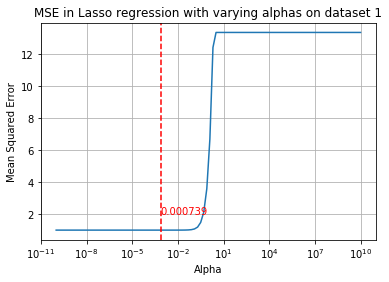

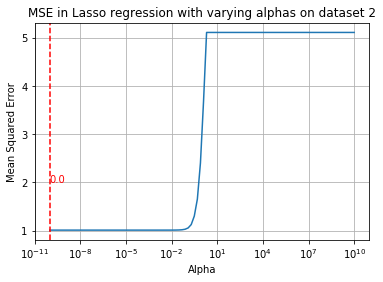

In [11]:
#Lasso: Run with different alphas, plot out-of-sample error
def lasso_alpha_test(X, y, X_test, y_test, test_alphas, dataset_name="Default"):
    alphas = []
    scores = []
    optimal_alpha = 0 
    best_score = float("inf")
    for i in test_alphas:
        lasso2 = LassoCV(alphas=[i], cv=5).fit(X,y)
        alphas.append(lasso2.alpha_)
        predicted = lasso2.predict(X_test)
        this_score = mean_squared_error(y_test, predicted)
        scores.append(this_score)
        if this_score < best_score: 
            best_score = this_score
            optimal_alpha = lasso2.alpha_
    #plot results
    plt.xscale('log')
    plt.grid(True)
    plt.plot(alphas, scores)
    plt.axvline(x=optimal_alpha, color='r', linestyle='--')
    plt.text(optimal_alpha,best_score+1,str(round(optimal_alpha, 6)),color='r')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error')
    plt.title("MSE in Lasso regression with varying alphas on dataset %s"%(dataset_name))
    plt.show()

test_alphas = np.logspace(-10, 10, 100)
lasso_alpha_test(X_1,y_1, X_1_test, y_1_test, test_alphas, dataset_name="1")
lasso_alpha_test(X_2,y_2, X_2_test, y_2_test, test_alphas, dataset_name="2")

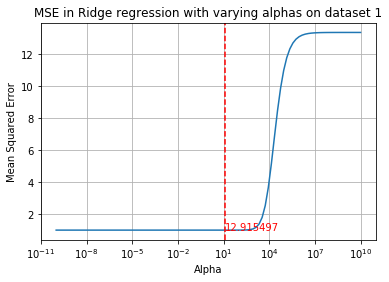

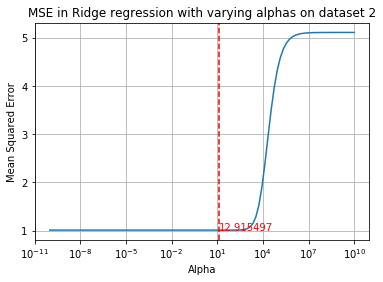

In [4]:
#Ridge: Run with different alphas, plot out-of-sample error
def ridge_alpha_test(X, y, X_test, y_test, test_alphas, dataset_name="Default"):
    alphas = []
    scores = []
    optimal_alpha = 0 
    best_score = float("inf")
    for i in test_alphas:
        ridge = RidgeCV(alphas=[i], cv=5).fit(X,y)
        alphas.append(ridge.alpha_)
        predicted = ridge.predict(X_test)
        this_score = mean_squared_error(y_test, predicted)
        scores.append(this_score)
        if this_score < best_score: 
            best_score = this_score
            optimal_alpha = ridge.alpha_
    #plot results
    plt.xscale('log')
    plt.grid(True)
    plt.plot(alphas, scores)
    plt.axvline(x=optimal_alpha, color='r', linestyle='--')
    plt.text(optimal_alpha,best_score,str(round(optimal_alpha, 6)),color='r')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error')
    plt.title("MSE in Ridge regression with varying alphas on dataset %s"%(dataset_name))
    plt.show()

test_alphas = np.logspace(-10, 10, 100)
ridge_alpha_test(X_1,y_1, X_1_test, y_1_test, test_alphas, dataset_name="1")
ridge_alpha_test(X_2,y_2, X_2_test, y_2_test, test_alphas, dataset_name="2")

**Problem 4** (35 points) Implement a simple 1 hidden layer neural network in PyTorch. Let’s use tanh as our activation function and a hidden layer of 10 neurons. Use this to fit the 2 data sets from Problem 3. Sample code to start you off is below. Talk about:
* Using the same test data sets as before, calculate the in-sample and out-of-sample error for the network.
* How does this compare to the error from the RidgeCV and LassoCV fits above?
* Just for the 1st data set, roughly how many epochs did it take to converge?
* Just for the 1st data set, roughly how many epochs does it take to converge if we change the activation function to ReLu?

----
The out-of-sample errors are similar to the ones found for the lasso and ridge regressions. For all datasets the MSE is approximately 1 (See plots generated below).

There doesn't seem to be a noticeable difference between the two activation functions, both converge at around 100-150 epochs. tanh seems to perform marginally better in the dataset 1 example.   

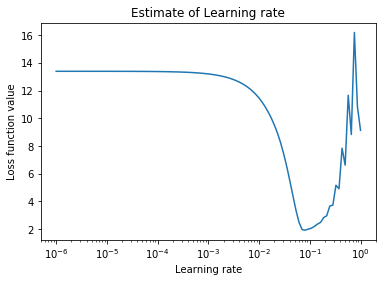

In [12]:
import torch 
# First, try to obtain a rough estimate for the learning rate as specified in 
# https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0
# The general idea is to find the learning rate that creates the fastest decrease in the loss.
# According to this, a value in between 1e-2 and 1e-1 should work fine
xin, yin = generate_test_data_set1(n)
xt, yt = generate_test_data_set1(n, test_sample = True )
xin = scaler.fit_transform(xin)
xt = scaler.fit_transform(xt)
F, H, out_size = 5, 10, 1

x = torch.tensor(xin, dtype=torch.float32)
y = torch.tensor(yin[:,np.newaxis], dtype=torch.float32)
x_t = torch.tensor(xt, dtype=torch.float32)
y_t = torch.tensor(yt[:,np.newaxis], dtype=torch.float32)
model = torch.nn.Sequential(torch.nn.Linear(F,H), torch.nn.Tanh(), torch.nn.Linear(H, out_size),)
loss_fn = torch.nn.MSELoss()
rates = np.logspace(-6, 0, 100)
scores_in = []
for t in range(100):
    optimizer = torch.optim.Adam(model.parameters(), lr=rates[t])
    model.train()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    scores_in.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.xscale('log')
plt.plot(rates, scores_in)
plt.xlabel('Learning rate')
plt.ylabel('Loss function value')
plt.title('Estimate of Learning rate')
plt.show()

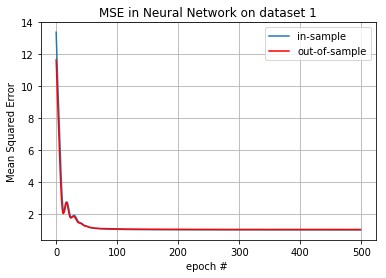

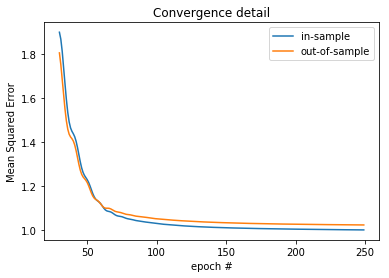

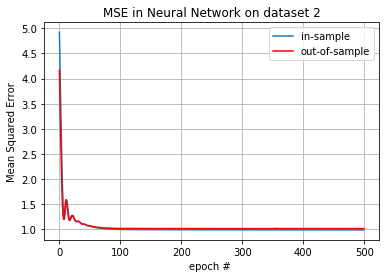

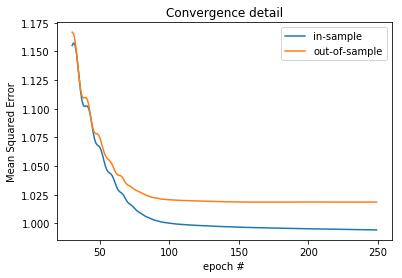

In [16]:
def nn_fit(F,H, out_size, x, y, x_test, y_test, num_iter=1500, dataset_name="Default"):
    x = torch.tensor(xin, dtype=torch.float32)
    y = torch.tensor(yin[:,np.newaxis], dtype=torch.float32)
    x_t = torch.tensor(x_test, dtype=torch.float32)
    y_t = torch.tensor(y_test[:,np.newaxis], dtype=torch.float32)
    model = torch.nn.Sequential(
            torch.nn.Linear(F,H),
            torch.nn.Tanh(),
            torch.nn.Linear(H, out_size),)
    loss_fn = torch.nn.MSELoss()
    learning_rate = 5e-2
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scores_in = []
    scores_out = []
    for t in range(num_iter):
        # TRAINING
        model.train()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        scores_in.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # TEST
        model.eval()
        y_pred = model(x_t)
        loss = loss_fn(y_pred, y_t)
        scores_out.append(loss.item())
    #plot in-sample error
    plt.grid(True)
    plt.plot(scores_in, label='in-sample')
    plt.plot(scores_out, color='r', label='out-of-sample')
    plt.xlabel('epoch # ')
    plt.ylabel('Mean Squared Error')
    plt.title("MSE in Neural Network on dataset %s"%(dataset_name))
    plt.legend()
    plt.show()
    # show detail of the convergence interval
    plt.plot(range(30,num_iter//2), scores_in[30:num_iter//2], label='in-sample')
    plt.plot(range(30,num_iter//2), scores_out[30:num_iter//2], label='out-of-sample')
    plt.xlabel('epoch #')
    plt.ylabel('Mean Squared Error')
    plt.title('Convergence detail')
    plt.legend()
    plt.show()
    
F, H, out_size = 5, 10, 1
iterations = 500
xin, yin = generate_test_data_set1(n)
xt, yt = generate_test_data_set1(n, test_sample = True )
xin = scaler.fit_transform(xin)
xt = scaler.fit_transform(xt)
nn_fit(F,H, out_size, xin, yin, xt, yt, iterations, dataset_name="1")

xin, yin = generate_test_data_set2(n)
xt, yt = generate_test_data_set2(n, test_sample = True )
xin = scaler.fit_transform(xin)
xt = scaler.fit_transform(xt)
nn_fit(F,H, out_size, xin, yin, xt, yt, iterations, dataset_name="2")

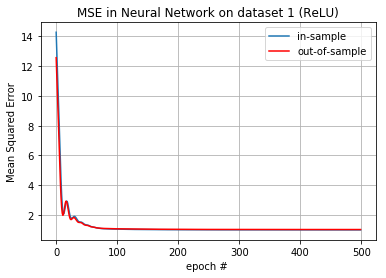

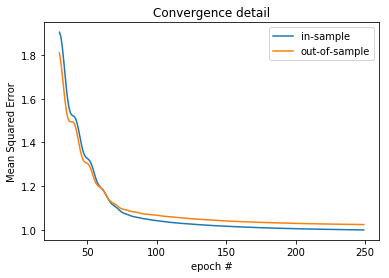

In [17]:
def nn_relu_fit(F,H, out_size, x, y, x_test, y_test, num_iter=1500, dataset_name="Default"):
    x = torch.tensor(xin, dtype=torch.float32)
    y = torch.tensor(yin[:,np.newaxis], dtype=torch.float32)
    x_t = torch.tensor(x_test, dtype=torch.float32)
    y_t = torch.tensor(y_test[:,np.newaxis], dtype=torch.float32)
    model = torch.nn.Sequential(
            torch.nn.Linear(F,H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, out_size),)
    loss_fn = torch.nn.MSELoss()
    learning_rate = 5e-2
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scores_in = []
    scores_out = []
    for t in range(num_iter):
        # TRAINING
        model.train()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        scores_in.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # TEST
        model.eval()
        y_pred = model(x_t)
        loss = loss_fn(y_pred, y_t)
        scores_out.append(loss.item())
    #plot errors
    plt.grid(True)
    plt.plot(scores_in, label='in-sample')
    plt.plot(scores_out, color='r', label='out-of-sample')
    plt.xlabel('epoch # ')
    plt.ylabel('Mean Squared Error')
    plt.title("MSE in Neural Network on dataset %s"%(dataset_name))
    plt.legend()
    plt.show()
    # show detail of the convergence interval
    plt.plot(range(30,num_iter//2), scores_in[30:num_iter//2], label='in-sample')
    plt.xlabel('epoch #')
    plt.ylabel('Mean Squared Error')
    plt.title('Convergence detail')
    plt.legend()
    plt.show()
    
F, H, out_size = 5, 10, 1
iterations = 500
xin, yin = generate_test_data_set1(n)
xt, yt = generate_test_data_set1(n, test_sample = True )
xin = scaler.fit_transform(xin)
xt = scaler.fit_transform(xt)
nn_fit(F,H, out_size, xin, yin, xt, yt, iterations, dataset_name="1 (ReLU)")